In [18]:
dirs = [
    "0354_maddpg_vanilla_cramped_room",
    "0355_maddpg_vanilla_asymmetric_advantages",
    "0355_maddpg_vanilla_forced_coordination",
]

rooms = [
    "cramped_room",
    "asymmetric_advantages",
    "forced_coordination"
]

In [2]:
import pandas as pd

dfs = [pd.read_csv(dir + '/train.csv') for dir in dirs]

In [5]:
print(dfs[0].head())

     duration  episode  episode_reward  soups   step
0  181.398611     26.0             3.0    0.0  10400
1  214.696503     27.0             3.0    0.0  10800
2  207.750242     28.0             0.0    0.0  11200
3  241.407765     29.0             0.0    0.0  11600
4  240.524470     30.0             0.0    0.0  12000
Index(['duration', 'episode', 'episode_reward', 'soups', 'step'], dtype='object')


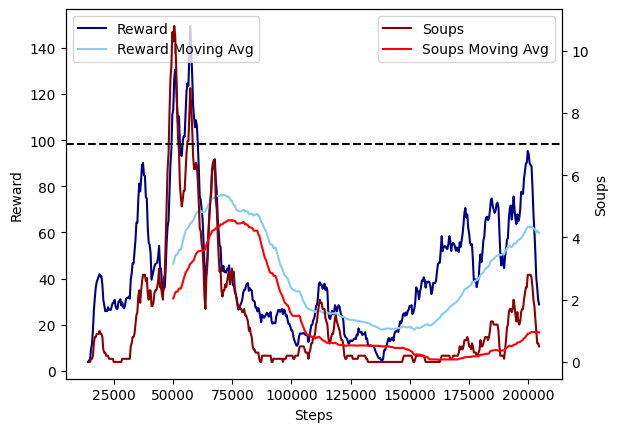

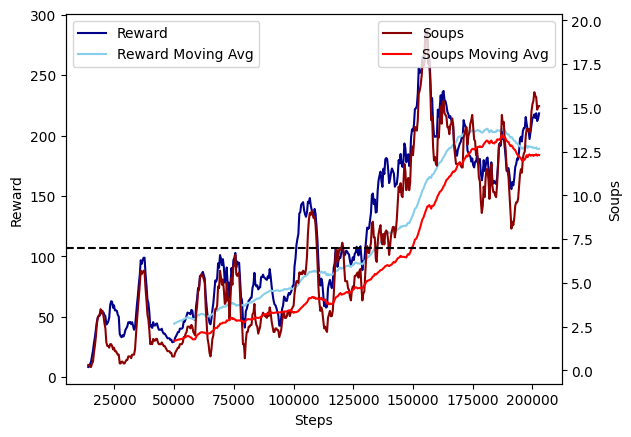

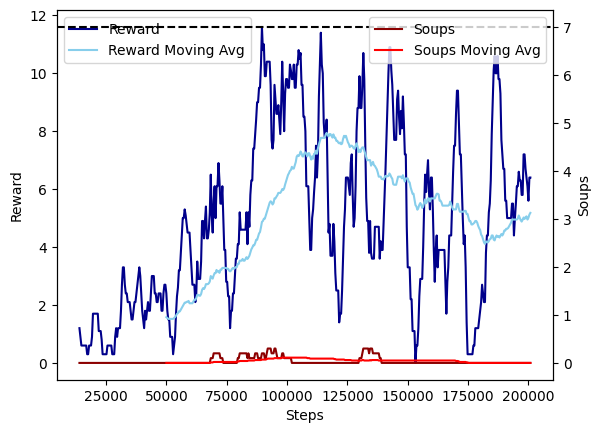

In [19]:
import matplotlib.pyplot as plt

for df, room in zip(dfs, rooms):
    df['soups_mvg_avg'] = df['soups'].rolling(window=100).mean()
    df['reward_mvg_avg'] = df['episode_reward'].rolling(window=100).mean()

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # ax1.plot(df['step'], df['episode_reward'], color='darkblue', label='Reward')
    # ax2.plot(df['step'], df['soups'], color='darkred', label='Soups')

    ax1.plot(df['step'], df['episode_reward'].rolling(window=10).mean(), color='darkblue', label='Reward')
    ax2.plot(df['step'], df['soups'].rolling(window=10).mean(), color='darkred', label='Soups')

    ax1.plot(df['step'], df['reward_mvg_avg'], color='skyblue', label='Reward Moving Avg')
    ax2.plot(df['step'], df['soups_mvg_avg'], color='red', label='Soups Moving Avg')

    ax2.axhline(y=7, color='black', linestyle='--')

    ax1.set_xlabel('Steps')
    ax1.set_ylabel('Reward')
    ax2.set_ylabel('Soups')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    fig.savefig(room + ".png")
    plt.show()

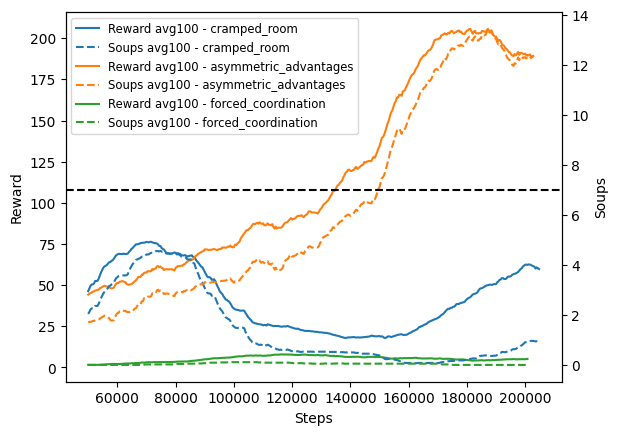

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

lines = []
labels = []

for df, room in zip(dfs, rooms):
    if 'soups_mvg_avg' in df.columns and 'reward_mvg_avg' in df.columns:
        line1, = ax1.plot(df['step'], df['reward_mvg_avg'], label='Reward avg100 - ' + room)
        line2, = ax2.plot(df['step'], df['soups_mvg_avg'], linestyle='--', label='Soups avg100 - ' + room)
        lines.extend([line1, line2])
        labels.extend([line1.get_label(), line2.get_label()])

ax2.axhline(y=7, color='black', linestyle='--')

ax1.set_xlabel('Steps')
ax1.set_ylabel('Reward')
ax2.set_ylabel('Soups')

ax1.legend(lines, labels, loc='upper left', fontsize='small')

plt.show()
